In [6]:
# Load required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

#from sklearn.preprocessing import StandardScaler

data = pd.read_csv('powerconsumption.csv')
data['Datetime'] = pd.to_datetime(data['Datetime'])
data.set_index('Datetime', inplace=True)


In [30]:
data.info

<bound method DataFrame.info of                      Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
Datetime                                                                     
2017-01-01 00:00:00        6.559      73.8      0.083                0.051   
2017-01-01 00:10:00        6.414      74.5      0.083                0.070   
2017-01-01 00:20:00        6.313      74.5      0.080                0.062   
2017-01-01 00:30:00        6.121      75.0      0.083                0.091   
2017-01-01 00:40:00        5.921      75.7      0.081                0.048   
...                          ...       ...        ...                  ...   
2017-12-30 23:10:00        7.010      72.4      0.080                0.040   
2017-12-30 23:20:00        6.947      72.6      0.082                0.051   
2017-12-30 23:30:00        6.900      72.8      0.086                0.084   
2017-12-30 23:40:00        6.758      73.0      0.080                0.066   
2017-12-30 23:50:00        6.580

In [31]:
data.isnull().sum()


Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

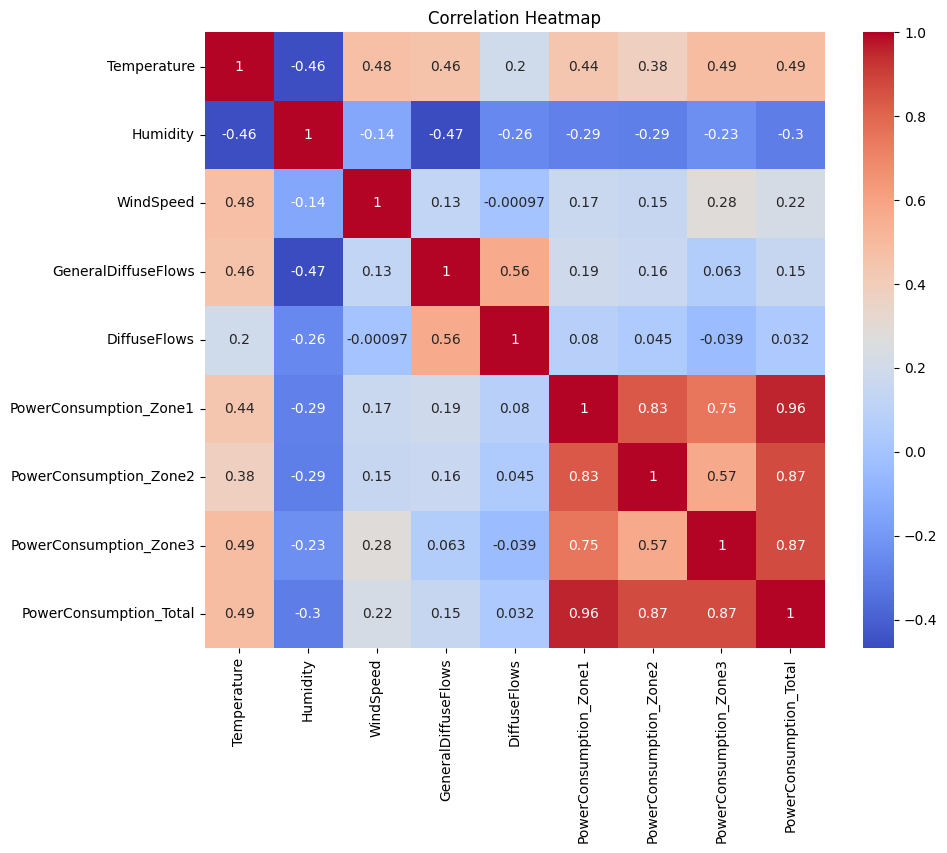

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

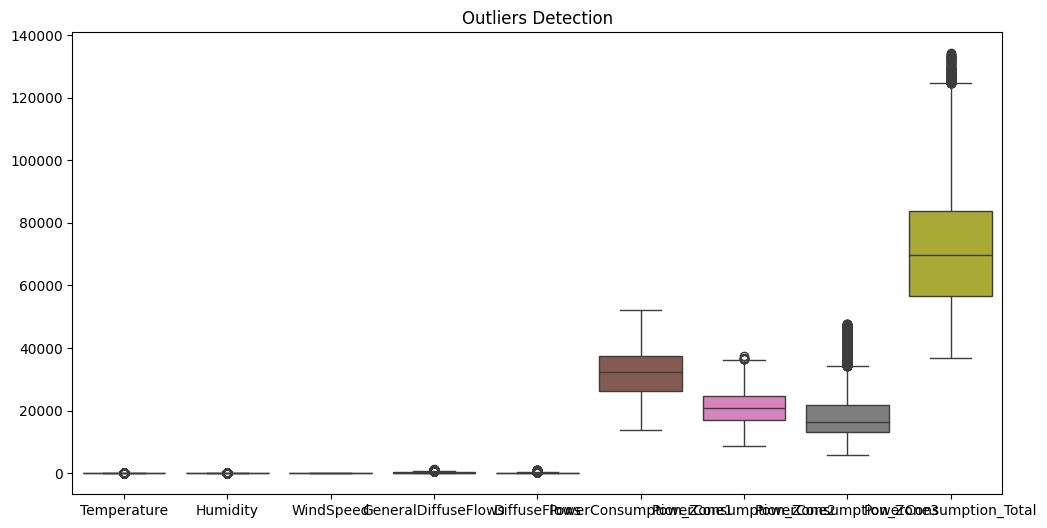

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(data)
plt.title('Outliers Detection')
plt.show()

In [7]:
data["PowerConsumption_Total"] = data['PowerConsumption_Zone1'] + data["PowerConsumption_Zone2"] + data["PowerConsumption_Zone3"]
x = data.drop(['PowerConsumption_Zone1','PowerConsumption_Zone2','PowerConsumption_Zone3'],axis=1)
y = data['PowerConsumption_Total']

In [35]:

data['Year'] = data.index.year

data['Month'] = data.index.month

data['Day'] = data.index.day

data['Hour'] = data.index.hour

data['Minute'] = data.index.minute

data['Weeknumber'] = data.index.isocalendar().week

data.loc[(data["Month"] == 1) & (data["Weeknumber"] == 52), "Weeknumber"] = 1

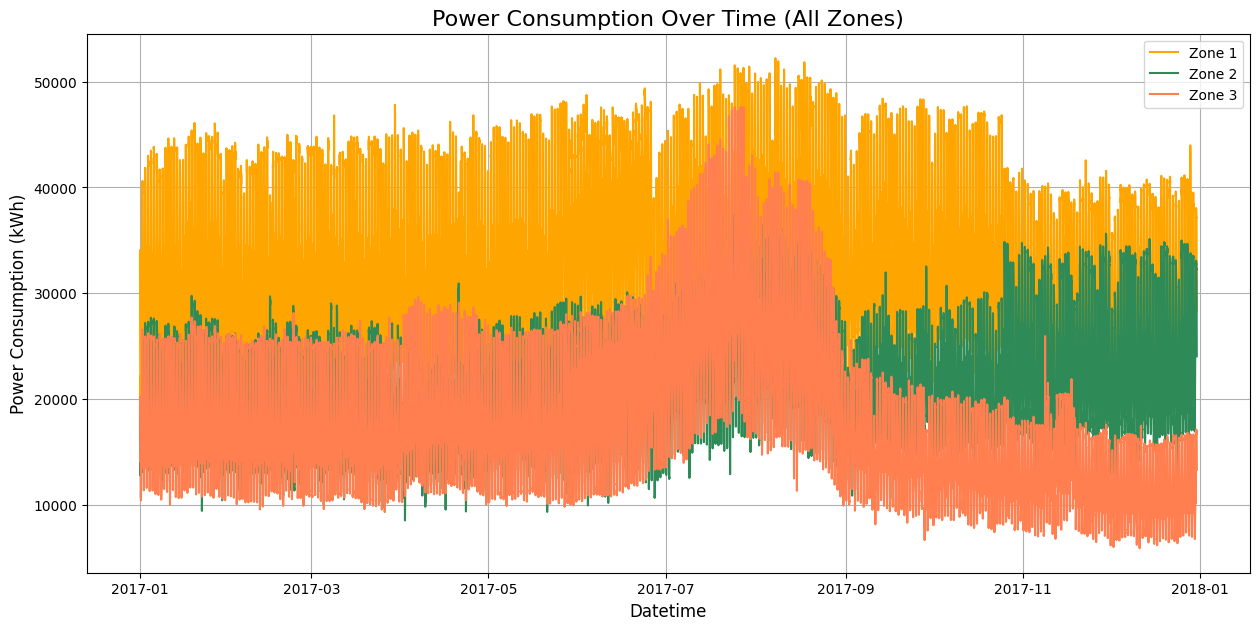

In [36]:

# Plot time-series data for power consumption in each zone
plt.figure(figsize=(15, 7))
plt.plot(data['PowerConsumption_Zone1'], label='Zone 1',color='orange')
plt.plot(data['PowerConsumption_Zone2'], label='Zone 2',color='seagreen')
plt.plot(data['PowerConsumption_Zone3'], label='Zone 3',color='coral')
plt.title('Power Consumption Over Time (All Zones)', fontsize=16)
plt.xlabel('Datetime', fontsize=12)
plt.ylabel('Power Consumption (kWh)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


<Axes: xlabel='Datetime'>

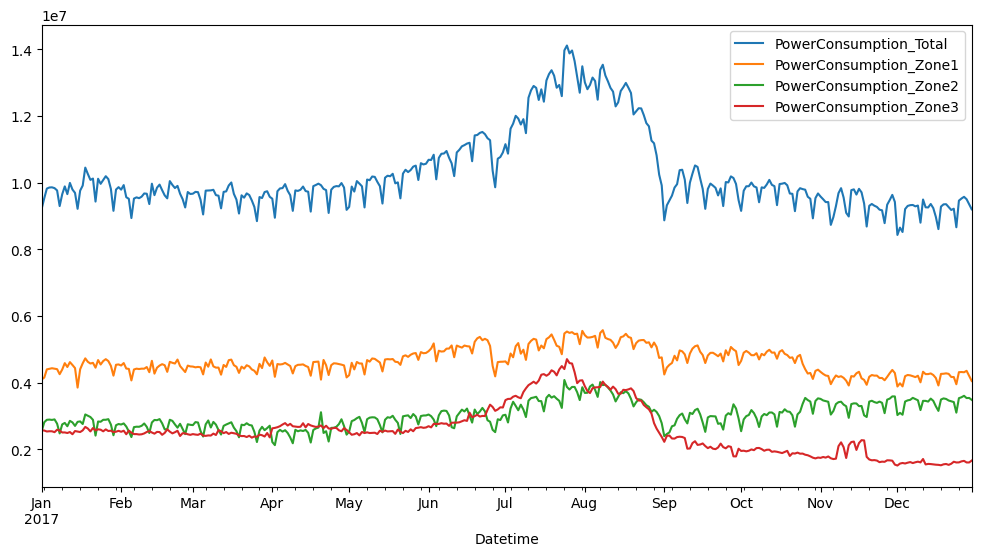

In [37]:
df_daily = data[["PowerConsumption_Total", "PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"]].resample("1d").sum()

fig, ax = plt.subplots(figsize=(12,6))

df_daily.plot(ax=ax)

<Axes: xlabel='Month', ylabel='PowerConsumption_Total'>

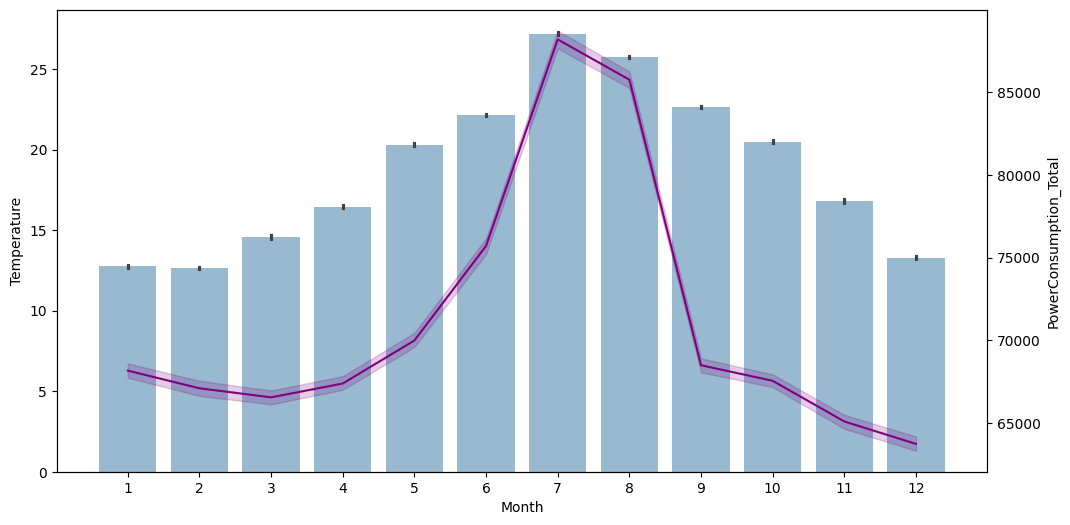

In [38]:
outros = data[['Temperature', 'Humidity', 'WindSpeed']].resample("1d").median()

df_daily = pd.concat([df_daily, outros], axis="columns")
fig, ax1 = plt.subplots(figsize=(12,6))
sns.barplot(data=data, x="Month", y="Temperature", ax=ax1, alpha=0.5)
ax2 = ax1.twinx()
sns.lineplot(data=data, x=data["Month"]-1, y="PowerConsumption_Total", ax=ax2, color="purple")

/var/folders/_w/mwpmpfkn5jg_8p2k41yhqxsw0000gn/T/ipykernel_32041/3032027733.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="Weeknumber", y="Humidity", ax=ax1, alpha=0.5,palette="Spectral")


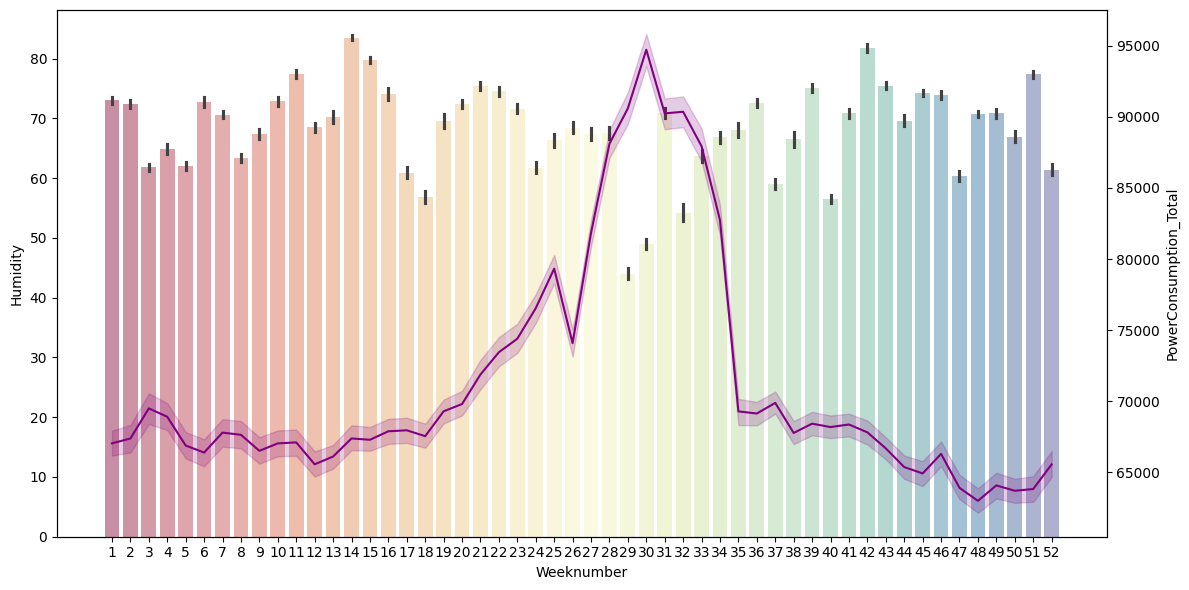

In [39]:
fig, ax1 = plt.subplots(figsize=(12,6))

sns.barplot(data=data, x="Weeknumber", y="Humidity", ax=ax1, alpha=0.5,palette="Spectral")

ax2 = ax1.twinx()
sns.lineplot(data=data, x=data["Weeknumber"]-1, y="PowerConsumption_Total", ax=ax2, color="purple")

plt.tight_layout()


/var/folders/_w/mwpmpfkn5jg_8p2k41yhqxsw0000gn/T/ipykernel_32041/3256530980.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Hour", y="PowerConsumption_Total",palette="pastel")


Text(0.5, 1.0, 'Power consumption per hour')

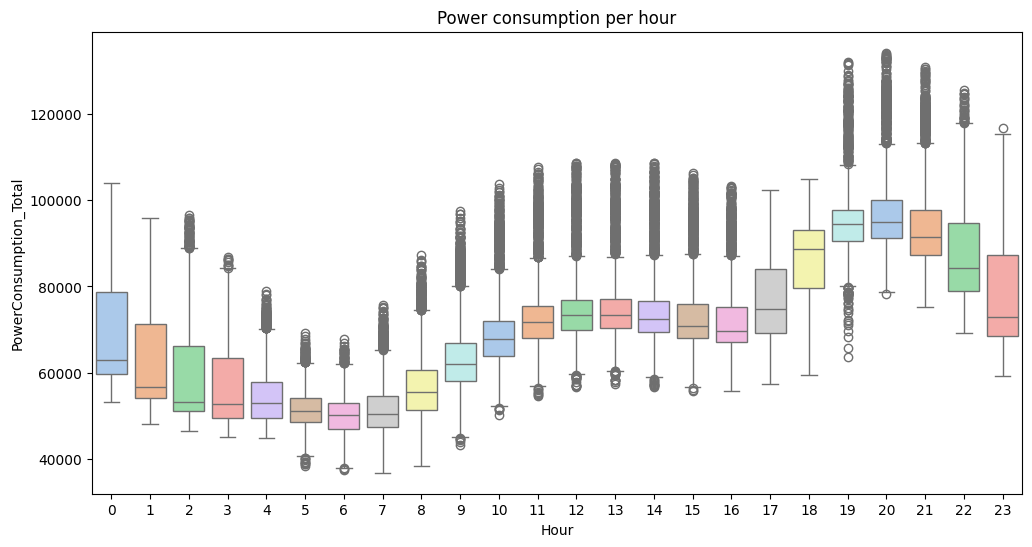

In [40]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=data, x="Hour", y="PowerConsumption_Total",palette="pastel")

plt.title("Power consumption per hour")

/var/folders/_w/mwpmpfkn5jg_8p2k41yhqxsw0000gn/T/ipykernel_34525/488082980.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = data.resample('H').mean()
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/lib/python3.12/site-p

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12275D+01    |proj g|=  7.92929D-02


 This problem is unconstrained.



At iterate    5    f=  1.11488D+01    |proj g|=  2.02258D-02

At iterate   10    f=  1.11415D+01    |proj g|=  5.56235D-04

At iterate   15    f=  1.11415D+01    |proj g|=  9.63704D-05

At iterate   20    f=  1.11415D+01    |proj g|=  5.10347D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     23     26      1     0     0   2.503D-05   1.114D+01
  F =   11.141495984175320     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


SARIMAX RMSE with exogenous variables: 14986.614012250617


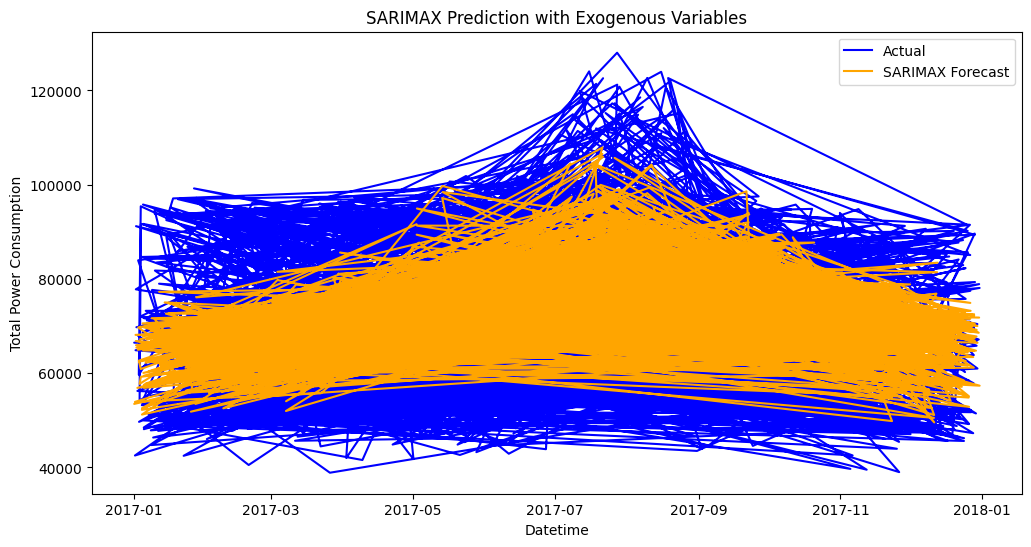

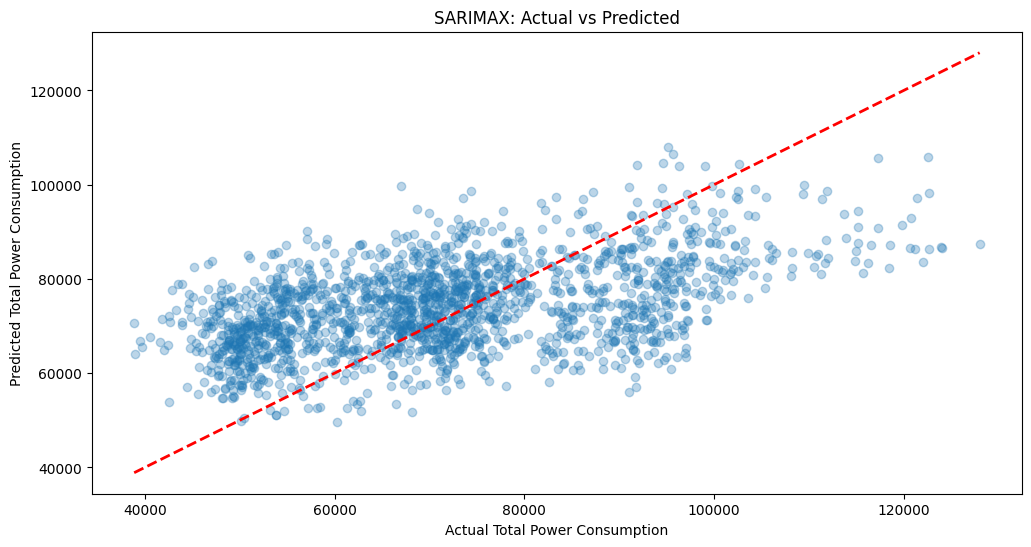

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()

hourly_data = data.resample('H').mean()

target = 'PowerConsumption_Total'
exogenous_vars = ['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows']

x_train, x_test, y_train, y_test = train_test_split(hourly_data[exogenous_vars],hourly_data[target], test_size=0.2, random_state=42)

X_train=Scaler.fit_transform(x_train)
X_test=Scaler.transform(x_test)

sarimax_model = SARIMAX(
    y_train, 
    exog=X_train, 
    order=(1, 1, 1), 
    seasonal_order=(1, 1, 1, 24) 
)
sarimax_fit = sarimax_model.fit()

sarimax_forecast = sarimax_fit.forecast(steps=len(y_test), exog=X_test)

sarimax_rmse = np.sqrt(mean_squared_error(y_test, sarimax_forecast))
print(f"SARIMAX RMSE with exogenous variables: {sarimax_rmse}")

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, sarimax_forecast, label='SARIMAX Forecast', color='orange')
plt.legend()
plt.title('SARIMAX Prediction with Exogenous Variables')
plt.xlabel('Datetime')
plt.ylabel('Total Power Consumption')
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(y_test,sarimax_forecast, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('SARIMAX: Actual vs Predicted')
plt.xlabel('Actual Total Power Consumption')
plt.ylabel('Predicted Total Power Consumption')
plt.show()

Random Forest RMSE: 10354.340768142087


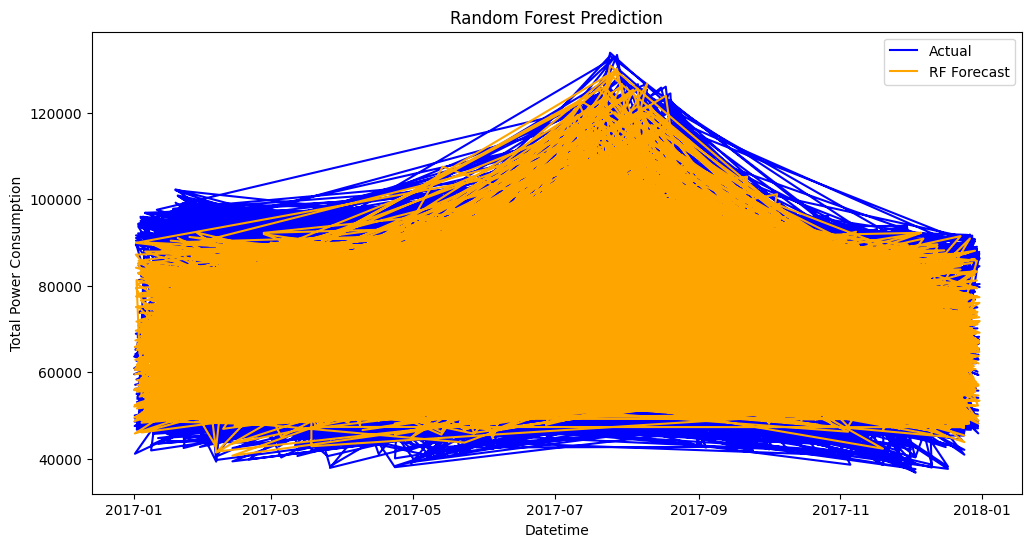

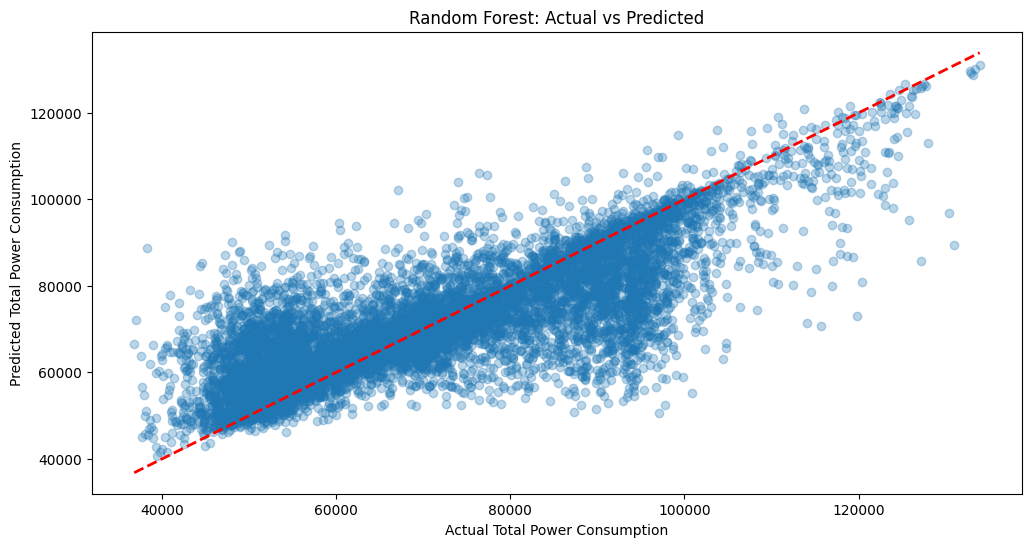

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

target = 'PowerConsumption_Total'
features = ['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 
            'DiffuseFlows']

data = data.dropna()

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
print(f"Random Forest RMSE: {rf_rmse}")


plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, rf_predictions , label='RF Forecast', color='orange')
plt.legend()
plt.title('Random Forest Prediction')
plt.xlabel('Datetime')
plt.ylabel('Total Power Consumption')
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(y_test, rf_predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Total Power Consumption')
plt.ylabel('Predicted Total Power Consumption')
plt.show()
